In [1]:
!git clone https://github.com/sovit-123/fastercnn-pytorch-training-pipeline.git

Cloning into 'fastercnn-pytorch-training-pipeline'...
remote: Enumerating objects: 1337, done.
remote: Counting objects: 100% (434/434), done.
remote: Compressing objects: 100% (150/150), done.
remote: Total 1337 (delta 325), reused 320 (delta 284), pack-reused 903
Receiving objects: 100% (1337/1337), 12.82 MiB | 27.52 MiB/s, done.
Resolving deltas: 100% (907/907), done.


In [2]:
# Enter the repo directory.
%cd fastercnn-pytorch-training-pipeline/

/kaggle/working/fastercnn-pytorch-training-pipeline


In [3]:
# Install the Requirements
!pip install -r requirements.txt

  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 952.4/952.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.2/426.2 kB 29.1 MB/s eta 0:00:00
  Created wheel for vision_transformers: filename=vision_transformers-0.1.1.0-py3-none-any.whl size=48414 sha256=0efbc7eb08b81286e85c214e28eedc466bd671352502acae6f62d317871e5677
  Stored in directory: /root/.cache/pip/wheels/02/f4/94/0a5c8d2a4fcb6aa4c590906ffd3d52dc8edbe94262ecaa7dae
Successfully built vision_transformers
  Attempting uninstall: setuptools
    Found existing installation: setuptools 69.0.3
    Uninstalling setuptools-69.0.3:
      Successfully uninstalled setuptools-69.0.3
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalle

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="4WvXgZogsppAlvCoVipp")
project = rf.workspace("fyppotholes").project("newdataset_pothole")
version = project.version(1)
dataset = version.download("voc")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.9/74.9 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 31.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12.1
  Attempting uninstall: certifi
    Found existing installation: certifi 2024.2.2
    U


Extracting Dataset Version Zip to newDataSet_Pothole-1 in voc:: 100%|██████████| 17443/17443 [00:03<00:00, 5209.04it/s]


In [5]:
%%writefile data_configs/custom_data.yaml
# Images and labels direcotry should be relative to train.py
TRAIN_DIR_IMAGES: '/kaggle/working/fastercnn-pytorch-training-pipeline/newDataSet_Pothole-1/train'
TRAIN_DIR_LABELS: '/kaggle/working/fastercnn-pytorch-training-pipeline/newDataSet_Pothole-1/train'
VALID_DIR_IMAGES: '/kaggle/working/fastercnn-pytorch-training-pipeline/newDataSet_Pothole-1/valid'
VALID_DIR_LABELS: '/kaggle/working/fastercnn-pytorch-training-pipeline/newDataSet_Pothole-1/valid'

# Class names.
CLASSES: [
    '__background__', 'pothole'
]

# Number of classes (object classes + 1 for background class in Faster RCNN).
NC: 2

# Whether to save the predictions of the validation set while training.
SAVE_VALID_PREDICTION_IMAGES: True

Writing data_configs/custom_data.yaml


In [6]:
!wandb disabled


W&B disabled.


In [7]:
 !python train.py --data data_configs/custom_data.yaml --epochs 20 --model fasterrcnn_resnet50_fpn_v2 --name custom_training --batch 8

2024-05-19 18:24:20.160253: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-19 18:24:20.160389: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-19 18:24:20.253137: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Not using distributed mode
device cuda
Checking Labels and images...
100%|████████████████████████████████████| 7762/7762 [00:00<00:00, 13213.46it/s]
Checking Labels and images...
100%|██████████████████████████████████████| 721/721 [00:00<00:00, 85593.20it/s]
Creating data loaders
Number of training samples: 7762
Number of validation samples: 721

Building model

In [8]:
import matplotlib.pyplot as plt
import glob as glob

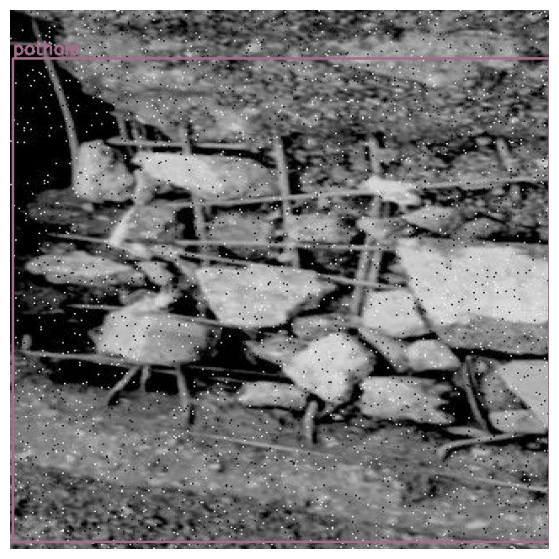

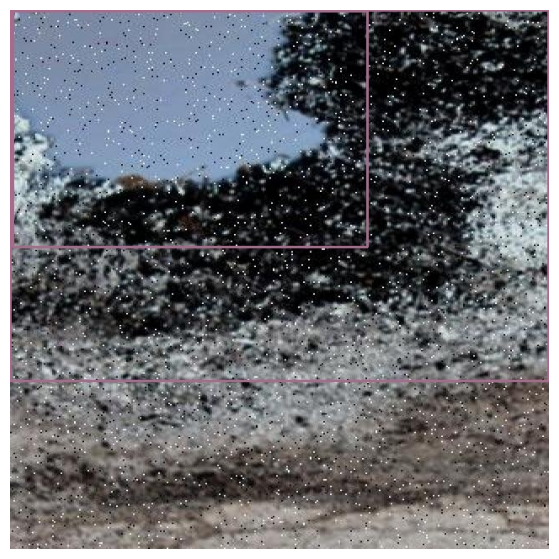

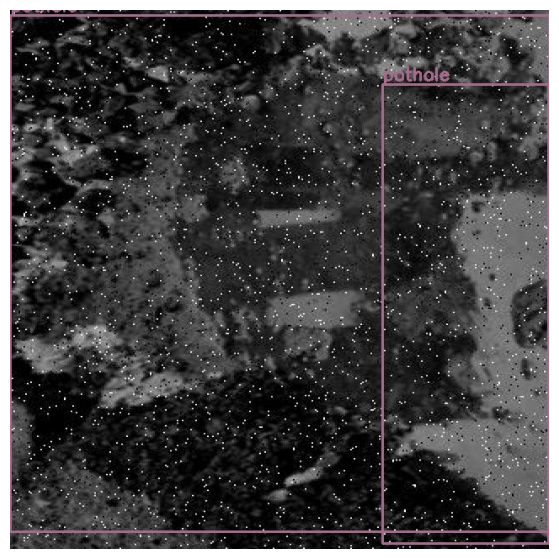

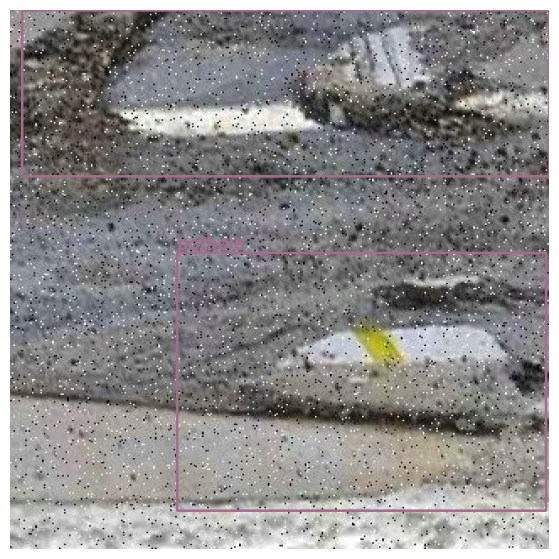

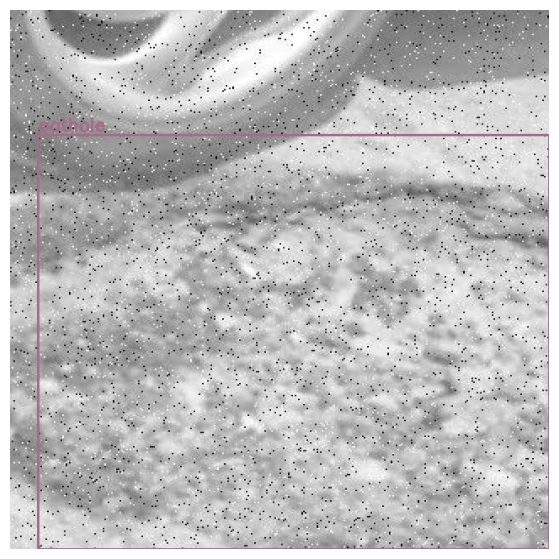

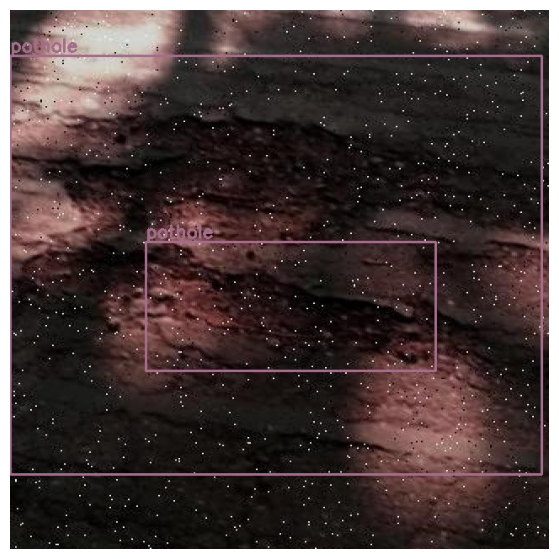

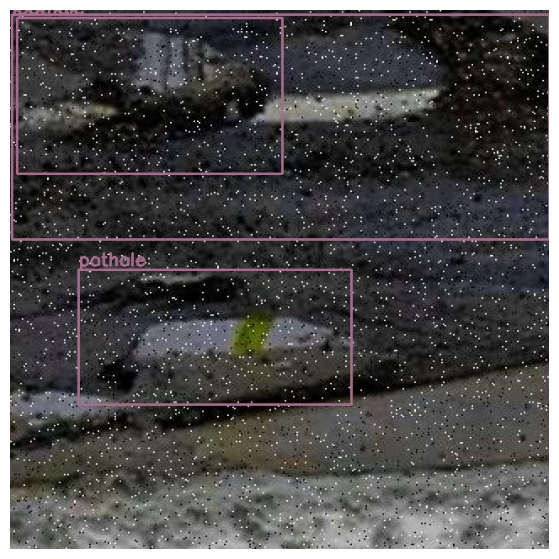

In [9]:
results_dir_path = 'outputs/training/custom_training'
valid_images = glob.glob(f"{results_dir_path}/*.jpg")

for i in range(7):
    plt.figure(figsize=(10, 7))
    image = plt.imread(valid_images[i])
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [10]:
# No verbose mAP.
!python eval.py --weights outputs/training/custom_training/best_model.pth --data data_configs/custom_data.yaml --model fasterrcnn_resnet50_fpn_v2

2024-05-20 04:06:30.666645: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-20 04:06:30.666725: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-20 04:06:30.668423: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Checking Labels and images...
100%|███████████████████████████████████████████| 91/91 [01:41<00:00,  1.12s/it]


{'classes': tensor(1, dtype=torch.int32),
 'map': tensor(0.3153),
 'map_50': tensor(0.6341),
 'map_75': tensor(0.2701),
 'map_large': tensor(0.3402),
 'map_medium': tensor(0.1418),
 'map_per_class': tensor(-1.),
 'map_small': tensor(0.),
 'mar_1': tens

In [11]:
# Verbose mAP.
!python eval.py --weights outputs/training/custom_training/best_model.pth --data data_configs/custom_data.yaml --model fasterrcnn_resnet50_fpn_v2 --verbose

2024-05-20 04:08:30.323874: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-20 04:08:30.323940: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-20 04:08:30.325477: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Checking Labels and images...
100%|███████████████████████████████████████████| 91/91 [01:41<00:00,  1.12s/it]


{'classes': tensor(1, dtype=torch.int32),
 'map': tensor(0.3153),
 'map_50': tensor(0.6341),
 'map_75': tensor(0.2701),
 'map_large': tensor(0.3402),
 'map_medium': tensor(0.1418),
 'map_per_class': tensor(0.3153),
 'map_small': tensor(0.),
 'mar_1': t

In [12]:
!git clone https://github.com/sovit-123/vision_transformers.git
%cd vision_transformers
!pip install .


Cloning into 'vision_transformers'...
remote: Enumerating objects: 915, done.
remote: Counting objects: 100% (317/317), done.
remote: Compressing objects: 100% (233/233), done.
remote: Total 915 (delta 155), reused 188 (delta 81), pack-reused 598
Receiving objects: 100% (915/915), 44.31 MiB | 33.94 MiB/s, done.
Resolving deltas: 100% (529/529), done.
/kaggle/working/fastercnn-pytorch-training-pipeline/vision_transformers
Processing /kaggle/working/fastercnn-pytorch-training-pipeline/vision_transformers
  Preparing metadata (setup.py) ... - \ done
  Created wheel for vision-transformers: filename=vision_transformers-0.1.1.0-py3-none-any.whl size=93448 sha256=7b9a9895006fa4fd4af9cad35b6c6d70d6c849194a08a9d62fcd9433d717a35a
  Stored in directory: /tmp/pip-ephem-wheel-cache-iir6lz39/wheels/2a/1d/8c/eb2c1be383515f254b8ab84510d011433c168455e9214351df
Successfully built vision-transformers
  Attempting uninstall: vision-transformers
    Found existing installation: vision_transformers 0.1

In [13]:
!python /kaggle/working/fastercnn-pytorch-training-pipeline/inference.py --input /kaggle/input/test-1/IMG-20240403-WA0004.jpg --weights /kaggle/working/fastercnn-pytorch-training-pipeline/outputs/training/custom_training/best_model.pth

2024-05-20 04:10:51.291104: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-20 04:10:51.291168: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-20 04:10:51.292882: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Building from model name arguments...
Test instances: 1
Image 1 done...
--------------------------------------------------
TEST PREDICTIONS COMPLETE
Traceback (most recent call last):
  File "/kaggle/working/fastercnn-pytorch-training-pipeline/inference.py", line 253, in <module>
    main(args)
  File "/kaggle/working/fastercnn-pytorch-training-pipeline/inference

In [14]:
!conda install -y gdown


Retrieving notices: ...working... done
/ - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | 

In [15]:
import zipfile
import os

def zip_folder(folder_path, zip_path):
    with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, _, files in os.walk(folder_path):
            for file in files:
                zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), folder_path))

# Example usage:
folder_path = '/kaggle/working/fastercnn-pytorch-training-pipeline'
zip_path = '/kaggle/working/fastercnn-pytorch-training-pipeline_8k_Dataset.zip'
zip_folder(folder_path, zip_path)

In [16]:
!zip -r custom_faster_rcnn_training_colab.zip /content/fastercnn-pytorch-training-pipeline

	zip warning: name not matched: /content/fastercnn-pytorch-training-pipeline

zip error: Nothing to do! (try: zip -r custom_faster_rcnn_training_colab.zip . -i /content/fastercnn-pytorch-training-pipeline)


In [17]:
%cd /kaggle/working/

/kaggle/working


In [18]:
ls

__notebook__.ipynb
fastercnn-pytorch-training-pipeline/
fastercnn-pytorch-training-pipeline_8k_Dataset.zip


In [19]:
import zipfile
import os

def zip_folder(folder_path, zip_path):
    with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, _, files in os.walk(folder_path):
            for file in files:
                zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), folder_path))

# Specify folder path and zip file path
folder_path = '/kaggle/working/fastercnn-pytorch-training-pipeline'
zip_path = '/kaggle/working/fastercnn-pytorch-training-pipeline_8k_Dataset.zip'

# Create the zip file
zip_folder(folder_path, zip_path)

# Print a message for downloading
print("Download fastercnn-pytorch-training-pipeline_8k_Dataset.zip from the Output tab.")


Download fastercnn-pytorch-training-pipeline_8k_Dataset.zip from the Output tab.
